# Flu Shot Learning:  Predict H1N1 and Seasonal Flu Vaccines

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

## Data Discovery 

In [36]:
#importing the train_features
train_var = pd.read_csv("training_set_features.csv")
train_var.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [37]:
#Importing the train labels
train_labels = pd.read_csv("training_set_labels.csv")
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [38]:
#Getting info about the data types of the features
train_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
respondent_id                  26707 non-null int64
h1n1_concern                   26615 non-null float64
h1n1_knowledge                 26591 non-null float64
behavioral_antiviral_meds      26636 non-null float64
behavioral_avoidance           26499 non-null float64
behavioral_face_mask           26688 non-null float64
behavioral_wash_hands          26665 non-null float64
behavioral_large_gatherings    26620 non-null float64
behavioral_outside_home        26625 non-null float64
behavioral_touch_face          26579 non-null float64
doctor_recc_h1n1               24547 non-null float64
doctor_recc_seasonal           24547 non-null float64
chronic_med_condition          25736 non-null float64
child_under_6_months           25887 non-null float64
health_worker                  25903 non-null float64
health_insurance               14433 non-null float64
opinion_h1n1_vacc_effective  

In [39]:
#Displaying the columns
train_var.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [40]:
train_var.shape

(26707, 36)

In [41]:
#Looking for NULL values, as they might require NA Imputation
train_var.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [42]:
#Checking for NULL values in the labels
train_labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [43]:
train_var.shape
#therefore the dataset has 26707 respondents (rows) and 36 features (columns)

(26707, 36)

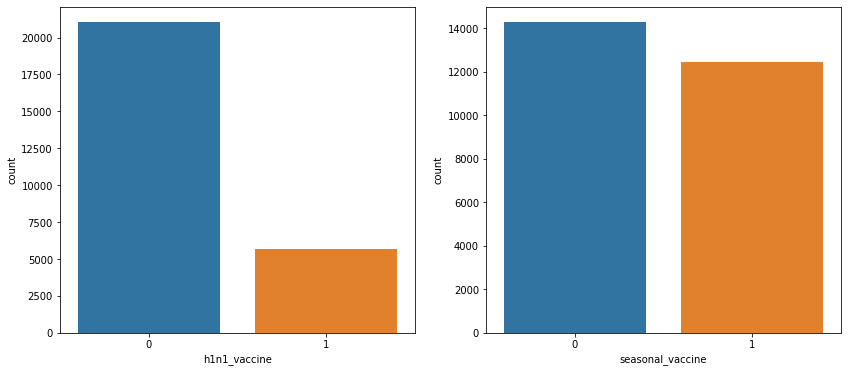

In [44]:
# visualising the labels
f, axes = plt.subplots(1,2 ,figsize=(14,6))
sb.countplot(x = "h1n1_vaccine", data = train_labels, ax = axes[0])
sb.countplot(x = "seasonal_vaccine", data = train_labels, ax = axes[1])

Presence of unbalanced classes, for both the labels especially h1n1_vaccine. h1n1_vaccine is in the ratio 1:4 which is highly unbalanced while seasonal vaccine is roughly in the ratio of 1:1. 

In [45]:
#Dropping the respondent's id variable from the dataset containing the features as it is a unique column and does not
#provide much insights
train_var = train_var.drop(["respondent_id"], axis = 1)

In [46]:
train_var.head()
#to confirm that the respondent's id has been removed as now there are only 35 variables (columns)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [17]:
#Dropping the respondent's id from the labels dataset
train_dep = train_labels.drop(["respondent_id"], axis=1)

#### Finidng the number of people who have and have not taken the H1N1 Vaccine

In [18]:
#Extract the feature h1n1_vaccine from the dataset
h1n1_vaccine = train_labels["h1n1_vaccine"]

In [47]:
#A count loop that tells us the number of data points for each class for Fun!!!
#this can be replaced with df.value_counts()
count_1 = 0
count_0 = 0
for i in h1n1_vaccine:
    if i == 0:
        count_0 += 1
    elif i == 1:
        count_1 += 1
    else:
        pass
print("count_0 = ", count_0)
print("count_1 = ", count_1)

count_0 =  21033
count_1 =  5674


In [50]:
#Cross-checking for loop with df.value_counts()
h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

#### Finding the number of people who have and have not taken the Seasonal Flu Vaccine

In [20]:
#Extracting the saesonal_vaccine column from the dataset
seasonal_vaccine = train_labels["seasonal_vaccine"]

In [21]:
#A for loop to find the count of data points for each class
count_0 = 0
count_1 = 0
for i in seasonal_vaccine:
    if i == 0:
        count_0 += 1
    elif i == 1:
        count_1 += 1
    else:
        pass
print("count_0 = ",count_0)
print("count_1 = ", count_1)

count_0 =  14272
count_1 =  12435


In [51]:
seasonal_vaccine.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

## Exploring the Data

In [22]:
#To gain statistical summary for the numeric variables
train_var.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


### H1N1 Features

##### 1. h1n1_concern = Level of concern about the H1N1 flu.

         0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

##### 2. h1n1_knowledge = Level of knowledge about H1N1 flu.

         0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

#### Before exploring: 
- Was expecting a strong correlation between concern and knowledge as practically, if a person is concerned about a disease it is logic for him to gain more knowledge about it from internet or other reliable sources.

- Was expecting a strong correlation between h1n1_concern and h1n1_vaccine OR h1n1_knowledge and h1n1_vaccines

However, I do acknowledge the fact that since the classes of each varaible, hln1_concern and h1n1_knowledge are different, h1n1_concern has 3 classes and h1n1_knowledge has 2 classes. Co-relation between the 2 features might not be that strong theoretically.

#### Finding the Relationship between h1n1_concern and h1n1_knowledge 

In [52]:
#Extracting the features h1n1_concern and h1n1_knowledge 
h1n1 = train_var[["h1n1_concern", "h1n1_knowledge"]]

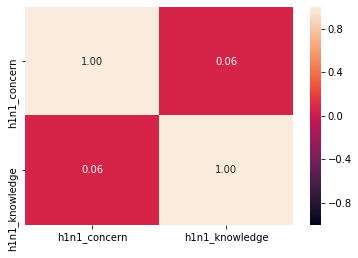

In [24]:
#To check and visualise the correlation between h1n1_concern and h1n1_knowledge
sb.heatmap(data=h1n1.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

The correlation between h1n1_concern and h1n1_knowledge is 0.06, which is very low. This is different from the value expected maybe because of the fact that the number of classes of the two variables are different. Therefore, this shows us that concern is not strongly related to knowledge.

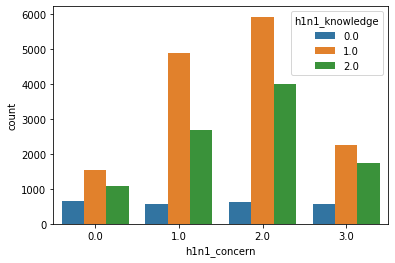

In [25]:
#visualising the relationship between h1n1_concern and h1n1_knowledge 
sb.countplot(x='h1n1_concern', data=h1n1, hue='h1n1_knowledge')

Majority of the respondents are somewhat concerned about H1N1 (2) and have a little knowledge about H1N1 (1). With a somewhat conerned attitude and little knwoledge of the H1N1 Flu, it makes sense that not many people took the H1N1 Vaccine. This is in line with the labels, Where the number of people who have taken the H1N1 Vaccine is 5674, which is very low.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


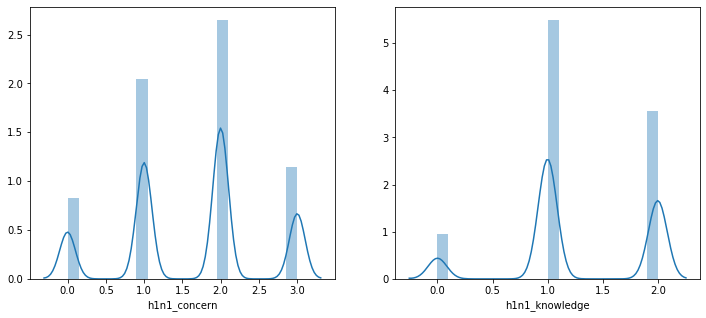

In [26]:
#Plotting Histograms to see the majority class
#Plotting KDE to see where the density lies 

f, axes = plt.subplots(1,2 ,figsize=(12,5))
sb.distplot(h1n1["h1n1_concern"], bins=20,  kde=True, ax = axes[0])
sb.distplot(h1n1["h1n1_knowledge"], bins=20, kde=True, ax = axes[1])

- Majority of the respondents are somewhat concerned about H1N1.
- Majority of the respondents have a little knowledge about H1N1.

#### Finding the relationship between h1n1_concern, h1n1_knowledge and h1n1_vaccine and seasonal_vaccine

In [27]:
#Concatenating the labels and the h1n1 features into one data frame
h1n1_labels = pd.concat([h1n1, train_dep], axis = 1)

In [28]:
h1n1_labels.head()

,h1n1_concern,h1n1_knowledge,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0,0
1,3.0,2.0,0,1
2,1.0,1.0,0,0
3,1.0,1.0,0,1
4,2.0,1.0,0,0


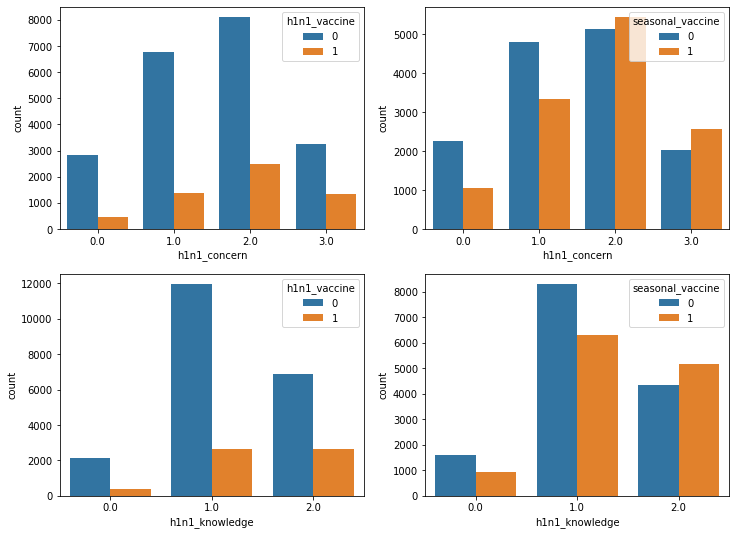

In [29]:
#Visualising the relationships 
f, axes = plt.subplots(2,2 ,figsize=(12,9))
sb.countplot(x='h1n1_concern', data=h1n1_labels, hue='h1n1_vaccine', ax = axes[0,0])
sb.countplot(x='h1n1_concern', data=h1n1_labels, hue='seasonal_vaccine', ax = axes[0,1])
sb.countplot(x='h1n1_knowledge', data=h1n1_labels, hue='h1n1_vaccine', ax = axes[1,0])
sb.countplot(x='h1n1_knowledge', data=h1n1_labels, hue='seasonal_vaccine', ax = axes[1,1])

###### Graph 1 =>  h1n1_concern VS h1n1_vaccine
- For each category, the number of people who have not taken the H1N1 vaccine is greater than those who have taken the H1N1 Vaccine
- Despite being very concerned (3) about H1N1, the number of people who have taken the vaccine is very low around 1500.

###### Graph 2 => h1n1_knowledge VS h1n1_vaccine
- Most people have a little knowledge (1) about H1N1 and have not taken the H1N1 Vaccine.

Out of the people who have taken the H1N1 Vaccine, most seem to have taken the Vaccine out of concern and not out of knowledge.

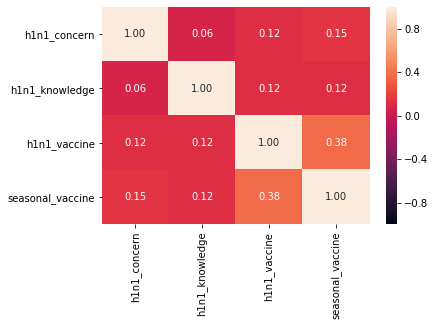

In [30]:
#finding the relationship between the h1n1_concern and h1n1_knowledge with h1n1_vaccine and seasonal_vaccine
sb.heatmap(data=h1n1_labels.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

##### h1n1_concern
Correlation between h1n1_concern and h1n1_vaccine = 0.12 \
Correlation between h1n1_knowledge and h1n1_vaccine = 0.12

##### h1n1_knowledge
Correlation between h1n1_concern and seasonal_vaccine = 0.15 \
Correlation between h1n1_knowledge and seasonal_vaccine = 0.12

Surprisingly, the correlation between h1n1_concern and seasonal_vaccine is stronger than h1n1_concern and h1n1_vaccine.

### Behavioural Features 

##### 1. behavioral_antiviral_meds = Has taken antiviral medications. (binary)
##### 2. behavioral_avoidance  = Has avoided close contact with others with flu-like symptoms. (binary)
##### 3. behavioral_face_mask = Has bought a face mask. (binary)
##### 4. behavioral_wash_hands = Has frequently washed hands or used hand sanitizer. (binary)
##### 5. behavioral_large_gatherings = Has reduced time at large gatherings. (binary)
##### 6. behavioral_outside_home = Has reduced contact with people outside of own household. (binary)
##### 7. behavioral_touch_face = Has avoided touching eyes, nose, or mouth. (binary)

In [29]:
#Extracting all the behavioural_X features 
behaviour = train_var[["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face"]]

In [30]:
behaviour.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0


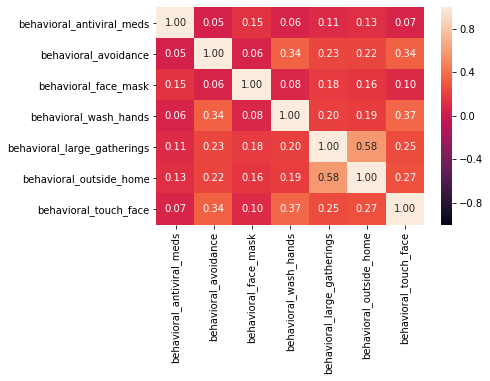

In [31]:
#Visualising the correlation between the various behavioural features 
sb.heatmap(data=behaviour.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [32]:
#Appending the label dataframe into the behaviour dataframe
behaviour_labels = pd.concat([behaviour, train_dep], axis = 1) 

In [33]:
behaviour_labels.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,h1n1_vaccine,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0


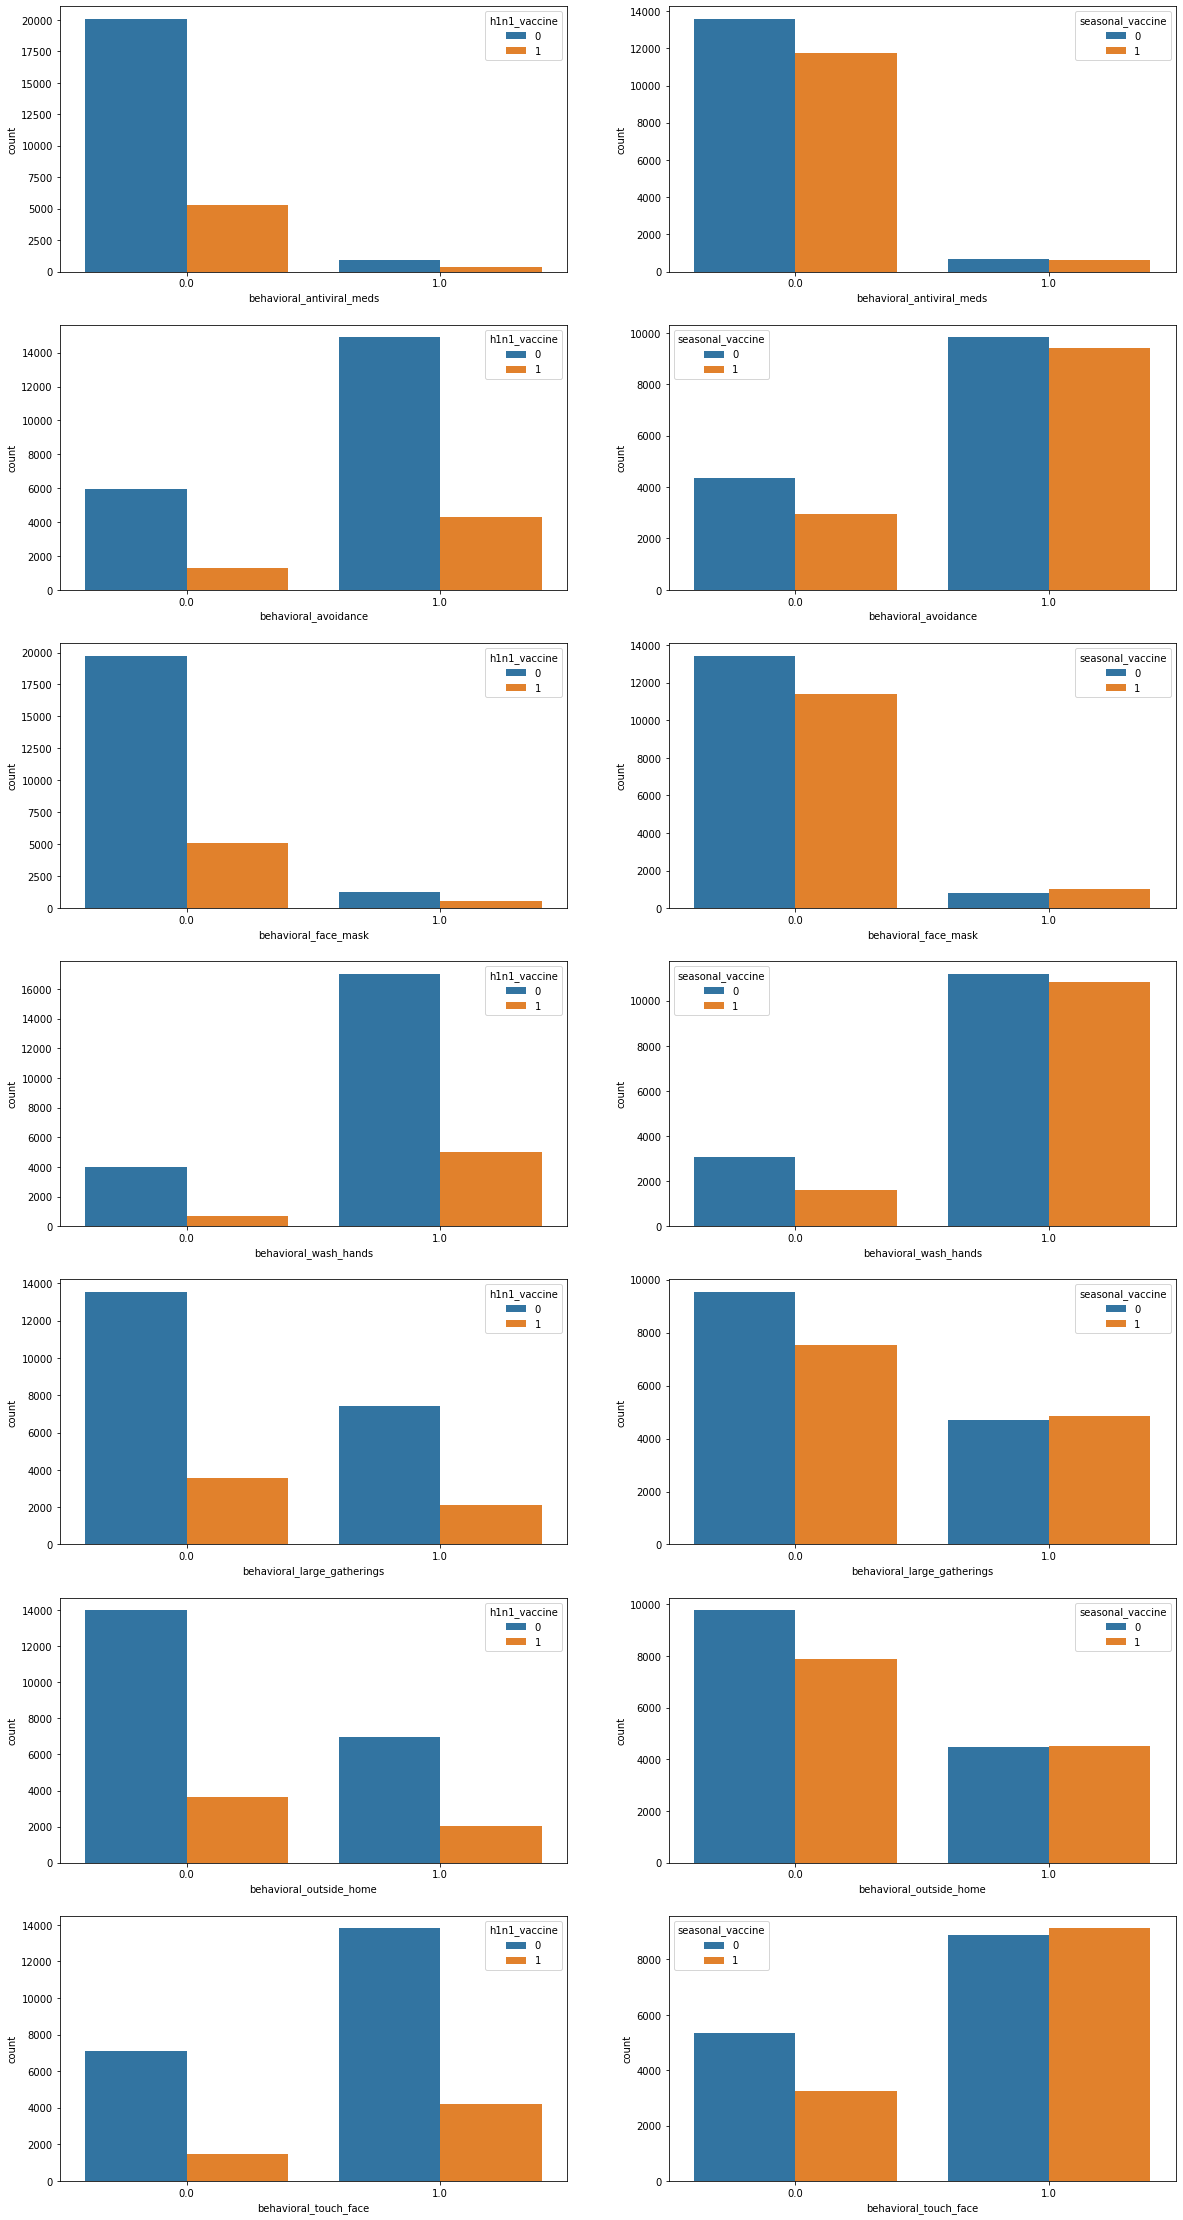

In [34]:
#Visualising h1n1_vaccine and seasonal_vaccine with respect to the behavioural features

f, axes = plt.subplots(7, 2, figsize=(20,40))
count = 0
for i in behaviour_labels:
    if count <= 6:
        sb.countplot(x=behaviour_labels[i], data=behaviour_labels, hue='h1n1_vaccine', ax = axes[count,0])
        sb.countplot(x=behaviour_labels[i], data=behaviour_labels, hue='seasonal_vaccine', ax = axes[count,1])
        count+=1
    else:
        break        

The graphs on the left, are in terms of h1n1_vaccine while the graphs on the right are in terms of seasonal_vaccine



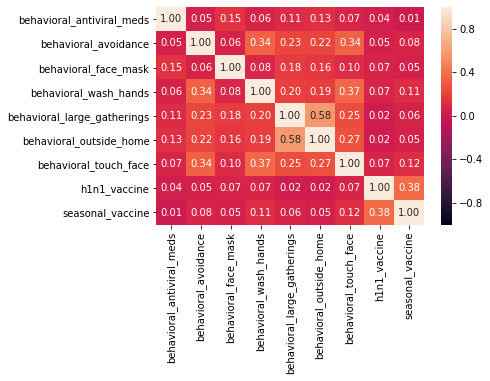

In [35]:
#Visualising the correlation between the behavioural features
sb.heatmap(data=behaviour_labels.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

The highest correlation is in between behavioural_large_gatherings and behavioural_outside_home of 0.58. 

The feature with the highest correlation to h1n1_vaccine is 

### Opinion Features

##### 1. opinion_h1n1_vacc_effective  
- Respondent's opinion about H1N1 vaccine effectiveness.
- 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. 

##### 2. opinion_h1n1_risk 
- Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
- 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

##### 3. opinion_h1n1_sick_from_vacc   
- Respondent's worry of getting sick from taking H1N1 vaccine.
- 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

##### 4. opinion_seas_vacc_effective    
- Respondent's opinion about seasonal flu vaccine effectiveness.
- 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

##### 5. opinion_seas_risk   
- Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
- 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

##### 6. opinion_seas_sick_from_vacc   
- Respondent's worry of getting sick from taking seasonal flu vaccine.
- 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.


In [36]:
opinion = train_var[["opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]]

In [37]:
opinion.head()

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
0,3.0,1.0,2.0,2.0,1.0,2.0
1,5.0,4.0,4.0,4.0,2.0,4.0
2,3.0,1.0,1.0,4.0,1.0,2.0
3,3.0,3.0,5.0,5.0,4.0,1.0
4,3.0,3.0,2.0,3.0,1.0,4.0


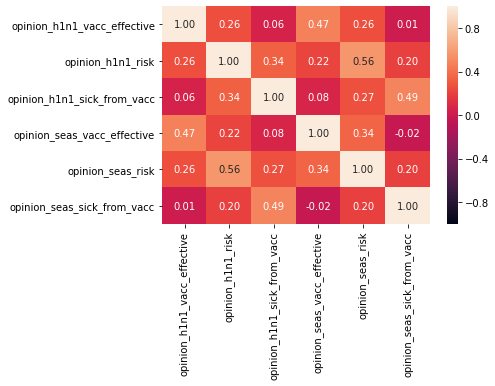

In [38]:
sb.heatmap(data=opinion.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [39]:
#Appending the label dataframe into the opinion dataframe
opinion_labels = pd.concat([opinion, train_dep], axis = 1) 

In [40]:
opinion_labels.head()

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,h1n1_vaccine,seasonal_vaccine
0,3.0,1.0,2.0,2.0,1.0,2.0,0,0
1,5.0,4.0,4.0,4.0,2.0,4.0,0,1
2,3.0,1.0,1.0,4.0,1.0,2.0,0,0
3,3.0,3.0,5.0,5.0,4.0,1.0,0,1
4,3.0,3.0,2.0,3.0,1.0,4.0,0,0


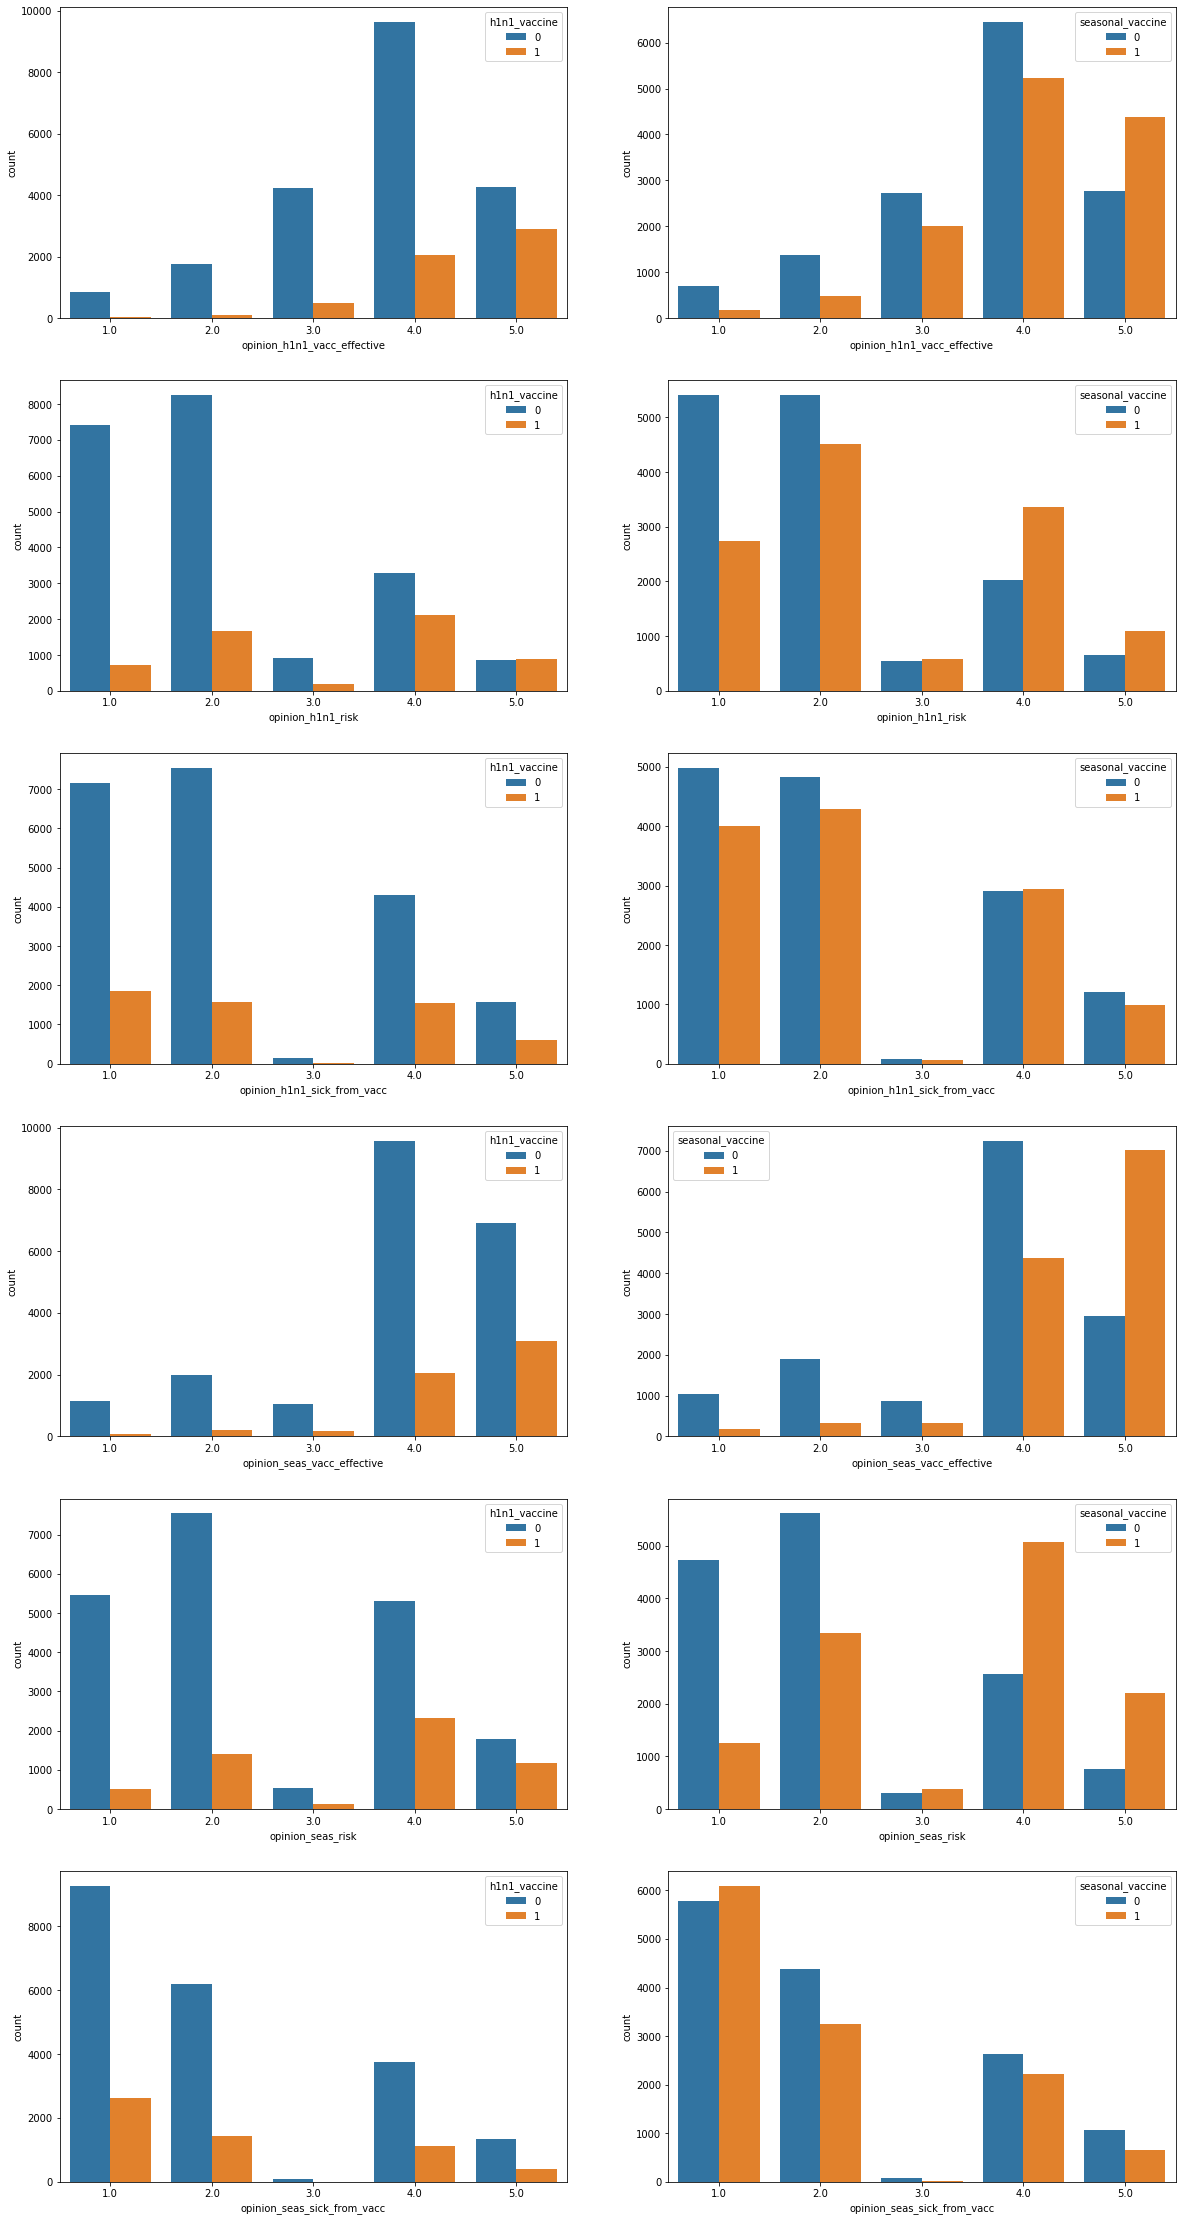

In [41]:
f, axes = plt.subplots(6, 2, figsize=(20,40))
count = 0
for i in opinion_labels:
    if count <= 5:
        sb.countplot(x=opinion_labels[i], data=opinion_labels, hue='h1n1_vaccine', ax = axes[count,0])
        sb.countplot(x=opinion_labels[i], data=opinion_labels, hue='seasonal_vaccine', ax = axes[count,1])
        count+=1
    else:
        break   

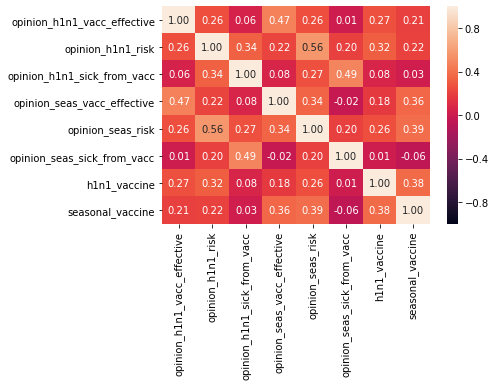

In [42]:
sb.heatmap(data=opinion_labels.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Health Workers and Insurance 

##### 1. health_worker  
- Is a healthcare worker. (binary)

##### 2. health_insurance  
- Has health insurance. (binary)

In [43]:
health = train_var[["health_worker", "health_insurance"]]

In [44]:
health.head()

,health_worker,health_insurance
0,0.0,1.0
1,0.0,1.0
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN


In [45]:
health.isnull().sum()

health_worker         804
health_insurance    12274
dtype: int64

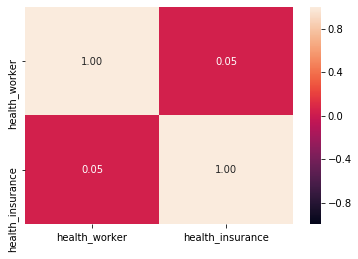

In [46]:
sb.heatmap(data=health.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [47]:
health_labels = pd.concat([health, train_dep], axis = 1) 

In [48]:
health_labels.head()

,health_worker,health_insurance,h1n1_vaccine,seasonal_vaccine
0,0.0,1.0,0,0
1,0.0,1.0,0,1
2,0.0,NaN,0,0
3,0.0,NaN,0,1
4,0.0,NaN,0,0


In [49]:
health_labels.isnull().sum()

health_worker         804
health_insurance    12274
h1n1_vaccine            0
seasonal_vaccine        0
dtype: int64

In [50]:
#health_labels = health_labels.dropna(how="any")

In [51]:
health_labels.shape

(26707, 4)

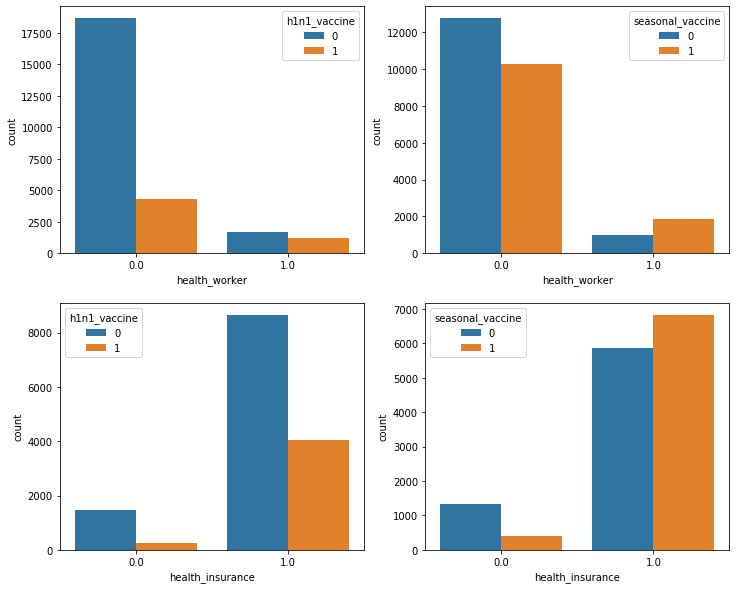

In [52]:
f, axes = plt.subplots(2, 2, figsize=(12,10))
count = 0
for i in health_labels:
    if count <= 1:
        sb.countplot(x=health_labels[i], data=health_labels, hue='h1n1_vaccine', ax = axes[count,0])
        sb.countplot(x=health_labels[i], data=health_labels, hue='seasonal_vaccine', ax = axes[count,1])
        count+=1
    else:
        break   

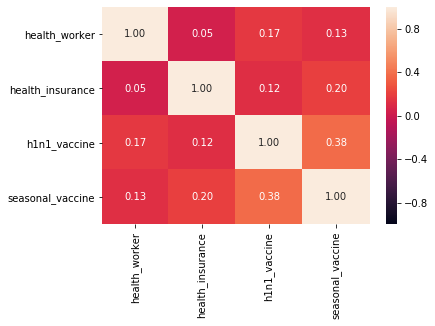

In [53]:
sb.heatmap(data=health_labels.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### One-Hot Encoding

In [54]:
#Finding out the categorical variables of the data type object
train_var.select_dtypes(['object']).columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [55]:
#Getting the 1s and 0s
dummies = pd.get_dummies(train_var[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']], drop_first=False)

In [56]:
#Viewing the dummies
dummies.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Dropping the original object data type features to make way for the new ones
train_var = train_var.drop(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'], axis=1)

In [58]:
#Concatenating the dummies and the original dataset
train_var = pd.concat([train_var, dummies], axis=1)

In [59]:
train_var.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#26707 rows with 105 features 
train_var.shape

(26707, 105)

#### NA Imputation

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [62]:
train_var.isnull().sum()

h1n1_concern                         92
h1n1_knowledge                      116
behavioral_antiviral_meds            71
behavioral_avoidance                208
behavioral_face_mask                 19
behavioral_wash_hands                42
behavioral_large_gatherings          87
behavioral_outside_home              82
behavioral_touch_face               128
doctor_recc_h1n1                   2160
doctor_recc_seasonal               2160
chronic_med_condition               971
child_under_6_months                820
health_worker                       804
health_insurance                  12274
opinion_h1n1_vacc_effective         391
opinion_h1n1_risk                   388
opinion_h1n1_sick_from_vacc         395
opinion_seas_vacc_effective         462
opinion_seas_risk                   514
opinion_seas_sick_from_vacc         537
household_adults                    249
household_children                  249
age_group_18 - 34 Years               0
age_group_35 - 44 Years               0


In [63]:
#Show those features which ARE of the data type - object
train_var.dtypes!="object"

h1n1_concern                      True
h1n1_knowledge                    True
behavioral_antiviral_meds         True
behavioral_avoidance              True
behavioral_face_mask              True
behavioral_wash_hands             True
behavioral_large_gatherings       True
behavioral_outside_home           True
behavioral_touch_face             True
doctor_recc_h1n1                  True
doctor_recc_seasonal              True
chronic_med_condition             True
child_under_6_months              True
health_worker                     True
health_insurance                  True
opinion_h1n1_vacc_effective       True
opinion_h1n1_risk                 True
opinion_h1n1_sick_from_vacc       True
opinion_seas_vacc_effective       True
opinion_seas_risk                 True
opinion_seas_sick_from_vacc       True
household_adults                  True
household_children                True
age_group_18 - 34 Years           True
age_group_35 - 44 Years           True
age_group_45 - 54 Years  

In [64]:
train_var.isnull().sum()

h1n1_concern                         92
h1n1_knowledge                      116
behavioral_antiviral_meds            71
behavioral_avoidance                208
behavioral_face_mask                 19
behavioral_wash_hands                42
behavioral_large_gatherings          87
behavioral_outside_home              82
behavioral_touch_face               128
doctor_recc_h1n1                   2160
doctor_recc_seasonal               2160
chronic_med_condition               971
child_under_6_months                820
health_worker                       804
health_insurance                  12274
opinion_h1n1_vacc_effective         391
opinion_h1n1_risk                   388
opinion_h1n1_sick_from_vacc         395
opinion_seas_vacc_effective         462
opinion_seas_risk                   514
opinion_seas_sick_from_vacc         537
household_adults                    249
household_children                  249
age_group_18 - 34 Years               0
age_group_35 - 44 Years               0


In [104]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [105]:
#first fit then transfor, or you can d fit_transform 
imp.fit(train_var) 

#transformation
train_var = imp.fit_transform(train_var)

In [106]:
train_var = pd.DataFrame(data=train_var)

In [107]:
train_var.shape

(26707, 105)

In [108]:
train_var.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
#Therefore, now there are no NaN va;ues in train_var
train_var.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
Length: 105, dtype: int64

#### Scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    train_var,
    train_dep,
    test_size=0.2,
    shuffle=True,
    stratify=train_dep,
    random_state=RANDOM_SEED
)

In [92]:
scaler = MinMaxScaler()

In [93]:
X_train = scaler.fit_transform(X_train)

In [94]:
X_test = scaler.fit_transform(X_test)

In [95]:
y_train = scaler.fit_transform(y_train)

In [113]:
y_test = scaler.fit_transform(y_test)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [98]:
clf = MultiOutputClassifier(LogisticRegression(penalty="l2", C=1))

In [99]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

MultiOutputClassifier(estimator=LogisticRegression(C=1, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_jobs=None)

In [100]:
prediction = clf.predict_proba(X_test)

In [101]:
prediction
#The probabilities are for Class 0 and CLass 1 respectively, we need to get 
# the second column as that tells us the probabilities of taking the vaccines

[array([[0.86336798, 0.13663202],
        [0.93534235, 0.06465765],
        [0.87676219, 0.12323781],
        ...,
        [0.54020494, 0.45979506],
        [0.57945078, 0.42054922],
        [0.97176849, 0.02823151]]), array([[0.48144218, 0.51855782],
        [0.91664352, 0.08335648],
        [0.4338987 , 0.5661013 ],
        ...,
        [0.3060185 , 0.6939815 ],
        [0.12780318, 0.87219682],
        [0.90080166, 0.09919834]])]

In [102]:
print("There are 2 arrays, one for 0 and one for 1 ")
print("array for 0 shape ", prediction[0].shape)
print("array for 1 shape ", prediction[1].shape)

There are 2 arrays, one for 0 and one for 1 
array for 0 shape  (5342, 2)
array for 1 shape  (5342, 2)


In [116]:
X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)
y_train = pd.DataFrame(data=y_train)
y_test = pd.DataFrame(data=y_test)

In [117]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": prediction[0][:, 1],
        "seasonal_vaccine": prediction[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.136632,0.518558
1,0.064658,0.083356
2,0.123238,0.566101
3,0.057037,0.296145
4,0.081375,0.843715


#### Plot

In [118]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

In [119]:
y_test.head()

,0,1
0,0.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


In [120]:
y_preds.head()

,h1n1_vaccine,seasonal_vaccine
0,0.136632,0.518558
1,0.064658,0.083356
2,0.123238,0.566101
3,0.057037,0.296145
4,0.081375,0.843715


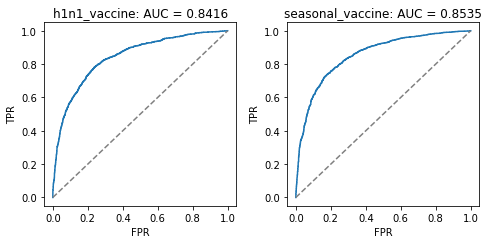

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test[0], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test[1], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [122]:
roc_auc_score(y_test, y_preds)

0.8475430958270868